In [3]:
train_data_url = "datasets/Data_Train.xlsx"
test_data_url = "datasets/Test_set.xlsx"

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_excel(train_data_url)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


<AxesSubplot:ylabel='Frequency'>

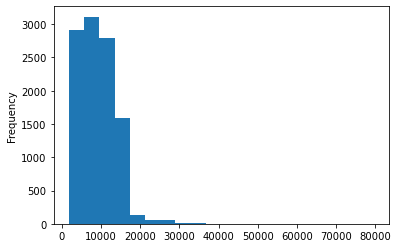

In [10]:
df['Price'].plot.hist(bins=20)  

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [16]:
df['date_month'] = pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.month
df['date_year'] = pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.year

In [17]:
df['dep_hours'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['dep_minute'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [24]:
duration = list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + "0m"
        else:
            duration[i] = "0h" + duration[i] 
hours = []
mins = []
            
for i in range(len(duration)):
    hours.append(duration[i].split("h")[0])
    mins.append(duration[i].split("m")[0].split()[-1])

In [30]:
airlines_dummies = pd.get_dummies(df["Airline"], prefix="Airline")

In [31]:
airlines_dummies.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.30, statify=True, random_state=42)
scale = StandardScaler()
X_Scale = scale.fit_transform(X)

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr)

In [ ]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)
print(selection.feature_importances_)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X,Y)
rf.score(x,y)
rf.predict(x,y)
rf.r2_score()

In [32]:
from sklearn.model_selection import RandomizedSearchCV

<AxesSubplot:xlabel='Airline', ylabel='Price'>

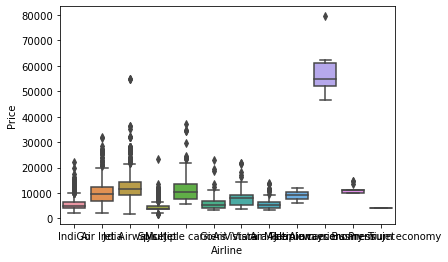

In [40]:
plt.
sns.boxplot(x=df['Airline'],y=df['Price'])